# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

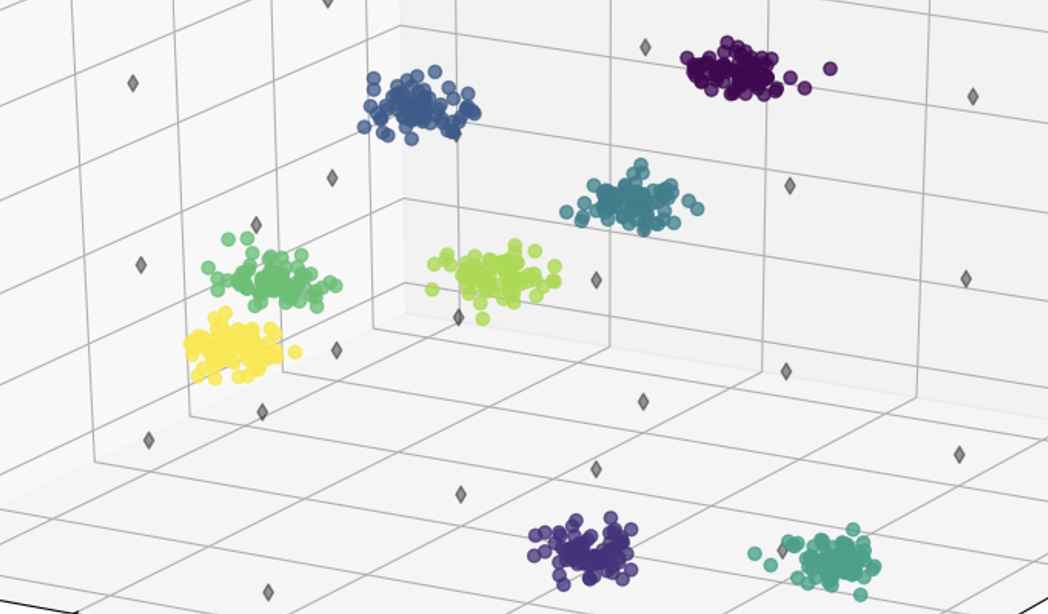

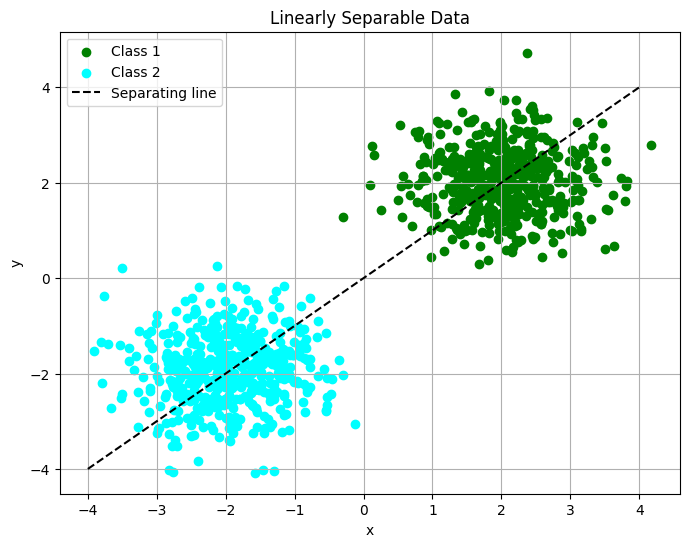

In [3]:
np.random.seed(42)

n_points = 500  
mean_class1 = [2, 2]

mean_class2 = [-2, -2]
cov = [[0.5, 0], [0, 0.5]]  
class1_data = np.random.multivariate_normal(mean_class1, cov, n_points)
class1_labels = np.ones(n_points)

class2_data = np.random.multivariate_normal(mean_class2, cov, n_points)
class2_labels = np.zeros(n_points)

data = np.vstack((class1_data, class2_data))
labels = np.hstack((class1_labels, class2_labels))

df = pd.DataFrame(data, columns=["x", "y"])
df['class'] = labels

df.to_csv('ls_datahw2.csv', index=False)


plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='green', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='cyan', label='Class 2')

x_vals = np.linspace(-4, 4, 100)
y_vals = x_vals
plt.plot(x_vals, y_vals, 'k--', label='Separating line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()


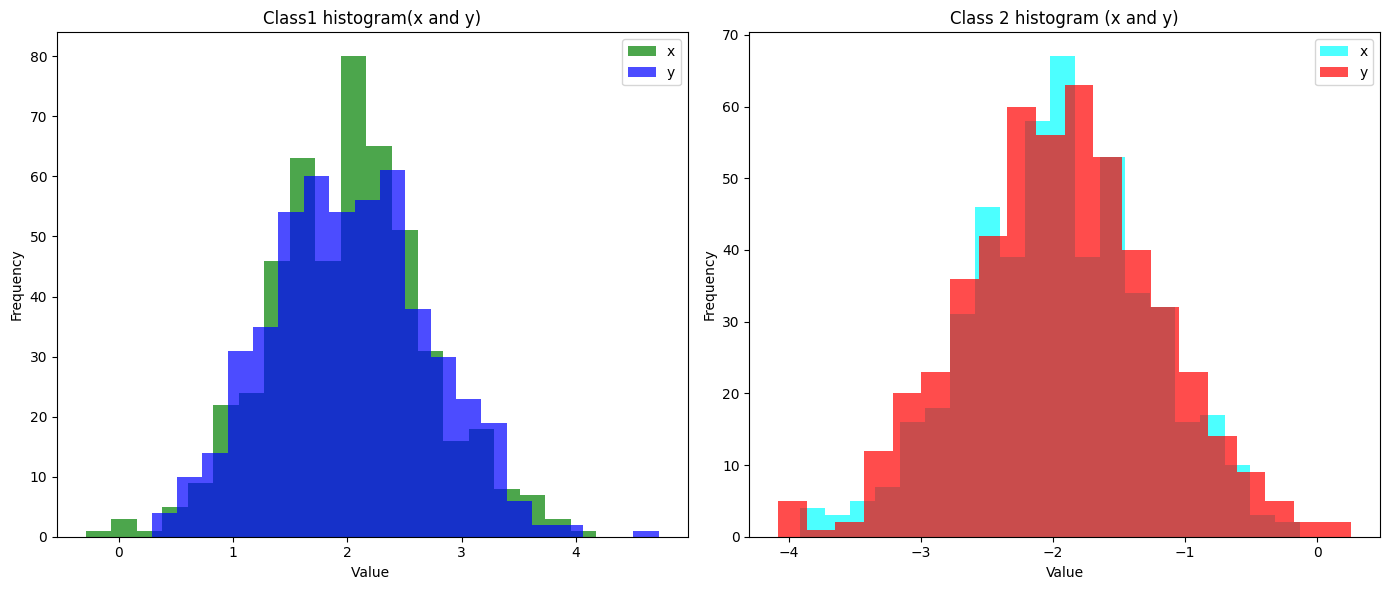

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(class1_data[:, 0], bins=20, alpha=0.7, label='x', color='green')
plt.hist(class1_data[:, 1], bins=20, alpha=0.7, label='y', color='blue')
plt.title('Class1 histogram(x and y)')
plt.xlabel('Value ')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(class2_data[:, 0], bins=20, alpha=0.7, label='x', color='cyan')
plt.hist(class2_data[:, 1], bins=20, alpha=0.7, label='y', color='red')
plt.title('Class 2 histogram (x and y)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Спочатку нам потрібні два класи, які можна легко розділити прямою лінією, тому нам потрібні лінійно роздільні множини.
Я згенерувала дві групи точок навколо центрів. Для класу 1 це центр 
[2,2][2,2], а для класу 2 — [−2,−2][−2,−2]. Тобтто, точки кожного класу розкидані по площині але зміщені, щоб їх можна було легко відокремити.
Щоб зробити дані більш природними, я додала трохи шуму через коваранс-матрицю. Це допомогло уникнути надто рівного розподілу, бо це було б не дуже реалістично.
Для генерації точок я використала нормальний розподіл щоб точки розташовувалися рівномірно, але з невеликим випадковим відхиленням. Так і створилася варіативність даних — щоб вони виглядали більш природно.

Отже дві групи точок з розкидом і між ними можна провести пряму лінію, яка їх чітко розділяє.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

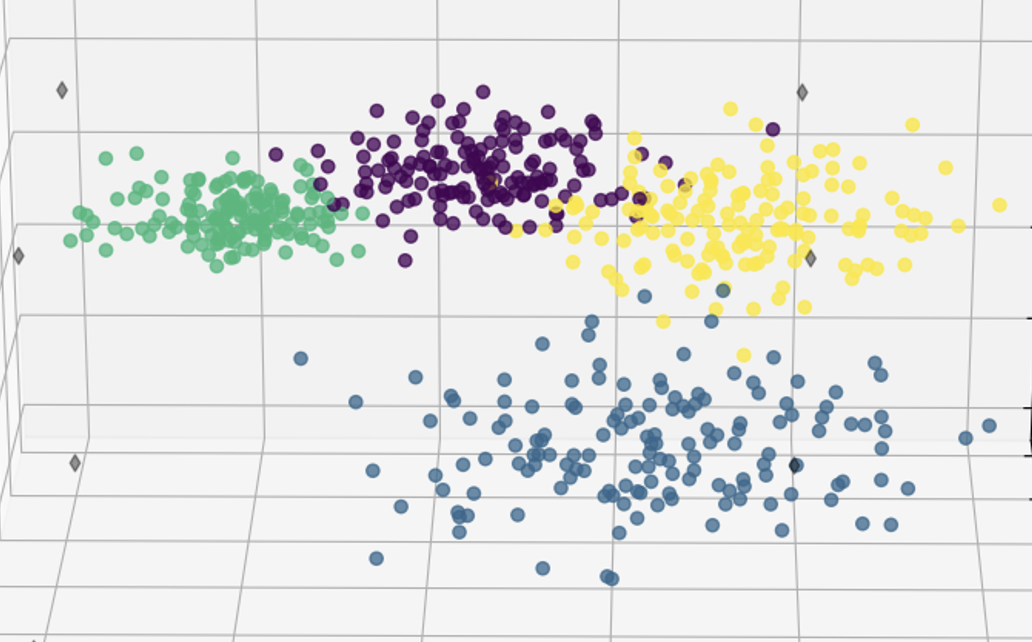

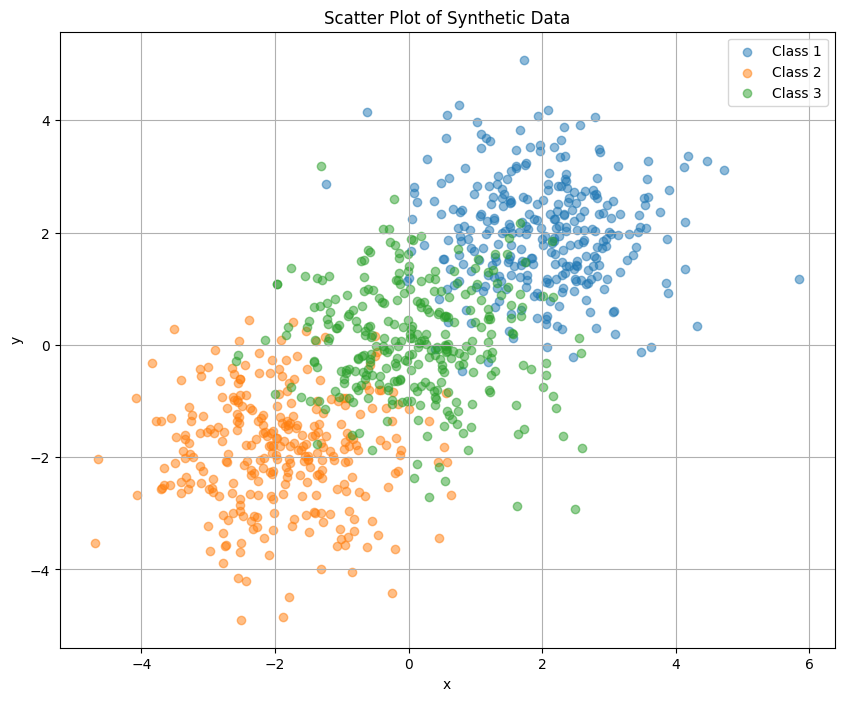

In [8]:
num_points_per_class = 300
center_class_1 = (2, 2)
center_class_2 = (-2, -2)
center_class_3 = (0, 0)
std_dev = 1.0 

np.random.seed(42) 

x_class_1 = np.random.normal(center_class_1[0], std_dev, num_points_per_class)
y_class_1 = np.random.normal(center_class_1[1], std_dev, num_points_per_class)
x_class_2 = np.random.normal(center_class_2[0], std_dev, num_points_per_class)
y_class_2 = np.random.normal(center_class_2[1], std_dev, num_points_per_class)
x_class_3 = np.random.normal(center_class_3[0], std_dev, num_points_per_class)
y_class_3 = np.random.normal(center_class_3[1], std_dev, num_points_per_class)

data = {
    'x': np.concatenate([x_class_1, x_class_2, x_class_3]),
    'y': np.concatenate([y_class_1, y_class_2, y_class_3]),
    'class': np.concatenate([
        np.full(num_points_per_class, 'class_1'),
        np.full(num_points_per_class, 'class_2'),
        np.full(num_points_per_class, 'class_3')
    ])
}
df = pd.DataFrame(data)
df.to_csv('sdatahw2.csv', index=False)

plt.figure(figsize=(10, 8))

plt.scatter(df[df['class'] == 'class_1']['x'], df[df['class'] == 'class_1']['y'], alpha=0.5, label='Class 1')
plt.scatter(df[df['class'] == 'class_2']['x'], df[df['class'] == 'class_2']['y'], alpha=0.5, label='Class 2')
plt.scatter(df[df['class'] == 'class_3']['x'], df[df['class'] == 'class_3']['y'], alpha=0.5, label='Class 3')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Synthetic Data')
plt.legend()
plt.grid(True)
plt.show()

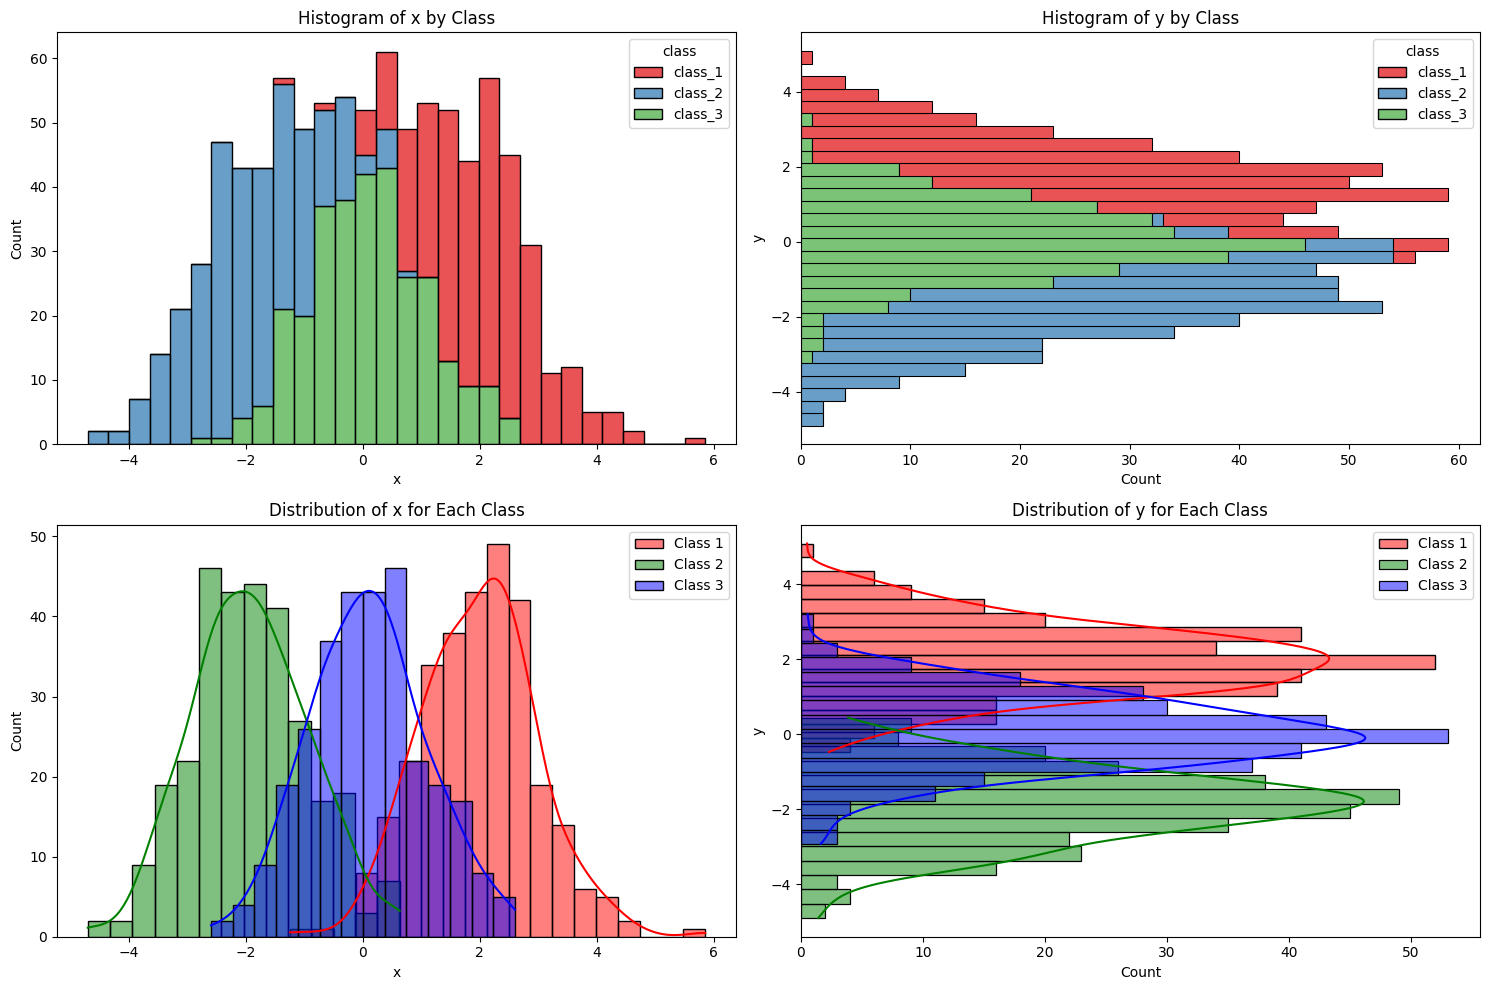

<Figure size 1000x800 with 0 Axes>

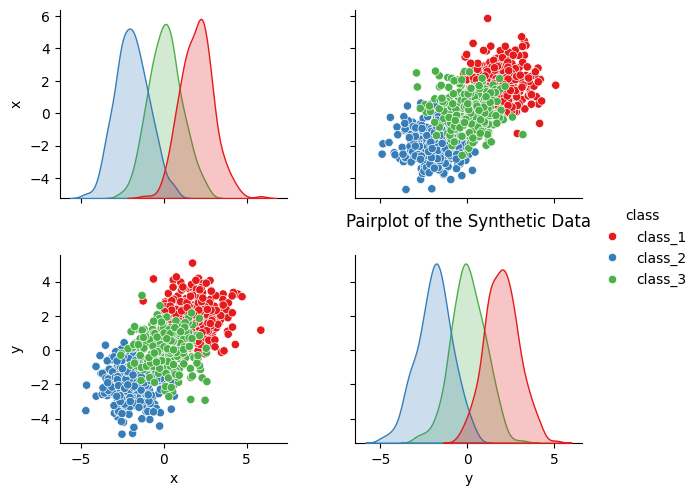

In [12]:

df = pd.read_csv('sdatahw2.csv')
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='x', hue='class', multiple='stack', palette='Set1', bins=30)
plt.title('Histogram of x by Class')

plt.subplot(2, 2, 2)
sns.histplot(data=df, y='y', hue='class', multiple='stack', palette='Set1', bins=30)
plt.title('Histogram of y by Class')

plt.subplot(2, 2, 3)
sns.histplot(data=df[df['class'] == 'class_1'], x='x', color='red', label='Class 1', kde=True)
sns.histplot(data=df[df['class'] == 'class_2'], x='x', color='green', label='Class 2', kde=True)
sns.histplot(data=df[df['class'] == 'class_3'], x='x', color='blue', label='Class 3', kde=True)
plt.title('Distribution of x for Each Class')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(data=df[df['class'] == 'class_1'], y='y', color='red', label='Class 1', kde=True)
sns.histplot(data=df[df['class'] == 'class_2'], y='y', color='green', label='Class 2', kde=True)
sns.histplot(data=df[df['class'] == 'class_3'], y='y', color='blue', label='Class 3', kde=True)
plt.title('Distribution of y for Each Class')
plt.legend()

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
g = sns.pairplot(df, hue='class', palette='Set1', height=2.5, aspect=1.2)
g.fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.title('Pairplot of the Synthetic Data', pad=20)  
plt.show()

Я використала нормальний розподіл для створення даних навколо трьох центрів класів. Це допомагає мені отримати дані з певною варіацією, як це часто буває в реальному житті. Нормальний розподіл забезпечує плавне перекриття між класами.
Щодо параметрів: вибрала три різні центри для класів. Один центр посередині, а два на крайніх позиціях, щоб було часткове перекриття. Стандартне відхилення встановила на 1.0. Це варіація, не надто велика або маленька. Велике відхилення зробило б класи занадто змішаними, а маленьке - недостатніми. Формат виходу це CSV-файл. Це просто і зручно для подальшого аналізу. А графіки, гістограми і кореляційні графіки допомагають  побачити, як дані розподілені і наскільки класи перекриваються. Це важливо для задач класифікації та аналізу.

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

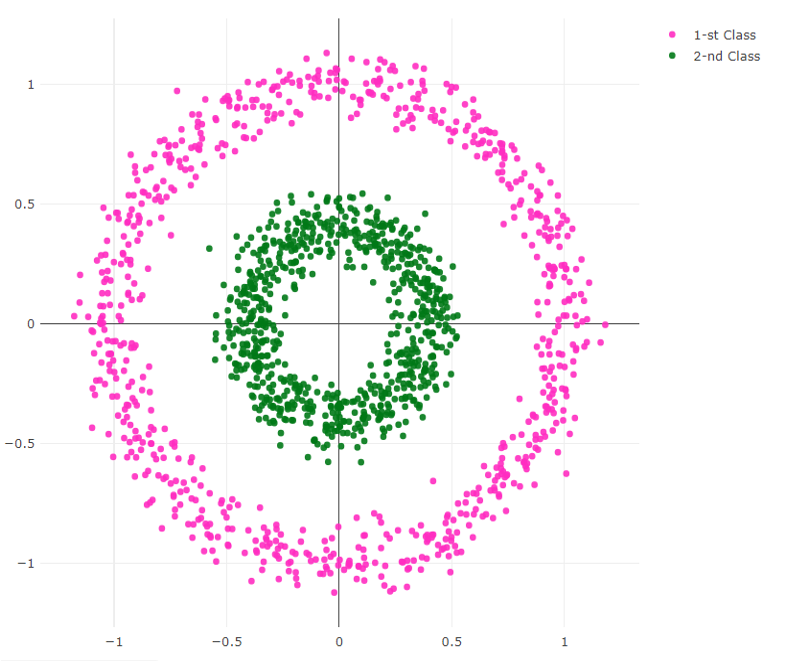

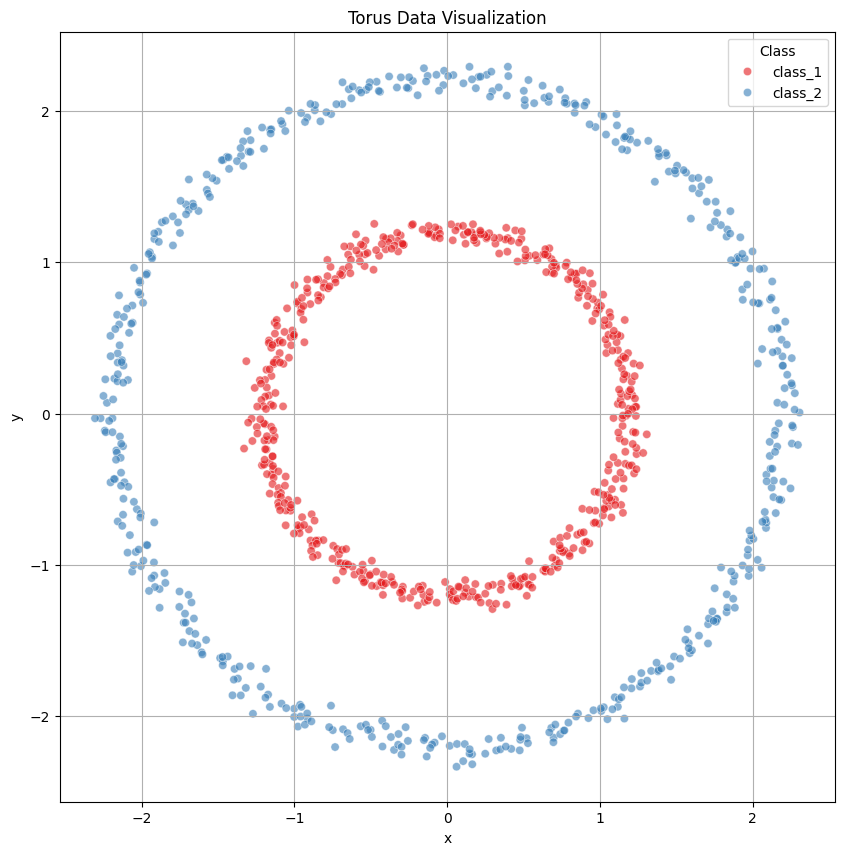

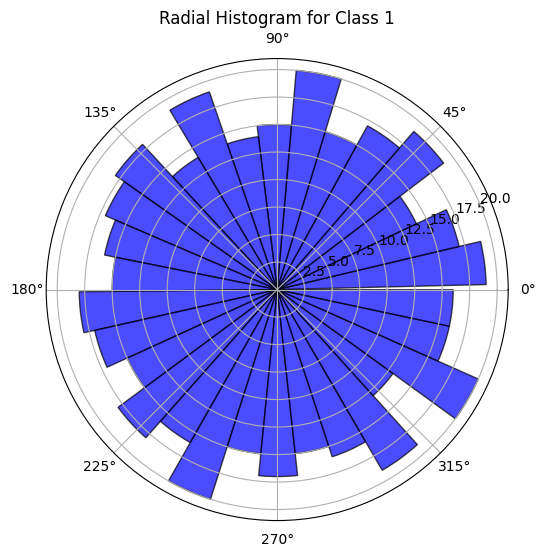

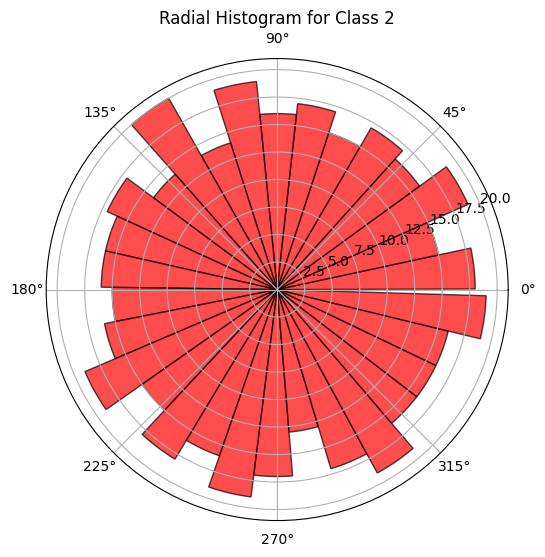

In [8]:
def generate_torus_points(radius, thickness, num_points, noise_level=0.05):
    theta = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    phi = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    theta, phi = np.meshgrid(theta, phi)
    theta = theta.flatten()
    phi = phi.flatten()
    
    x = (radius + thickness * np.cos(phi)) * np.cos(theta)
    y = (radius + thickness * np.cos(phi)) * np.sin(theta)
    
    x += np.random.normal(0, noise_level, len(x))
    y += np.random.normal(0, noise_level, len(y))
    
    return x, y


inner_torus_radius = 1.0
outer_torus_radius = 2.0
torus_thickness = 0.2
num_points_per_class = 500  
noise_level = 0.05

x_inner, y_inner = generate_torus_points(inner_torus_radius, torus_thickness, num_points_per_class, noise_level)
x_outer, y_outer = generate_torus_points(outer_torus_radius, torus_thickness, num_points_per_class, noise_level)

df_inner = pd.DataFrame({
    'x': x_inner[:num_points_per_class],  
    'y': y_inner[:num_points_per_class],  
    'class': 'class_1'
})

df_outer = pd.DataFrame({
    'x': x_outer[:num_points_per_class],  
    'y': y_outer[:num_points_per_class],  
    'class': 'class_2'
})

df = pd.concat([df_inner, df_outer], ignore_index=True)
df.to_csv('tdatahw2.csv', index=False)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='Set1', alpha=0.6)

plt.title('Torus Data Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class')
plt.grid(True)
plt.show()

def compute_radius_angle(x, y):
    radius = np.sqrt(x**2 + y**2)
    angle = np.arctan2(y, x)  
    angle = np.mod(angle, 2 * np.pi)  
    return radius, angle


df['radius'], df['angle'] = compute_radius_angle(df['x'], df['y'])
def radial_histogram(df_class, color, title):
    angles = df_class['angle']
    
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    ax.hist(angles, bins=30, color=color, alpha=0.7, edgecolor='black', linewidth=1)
    ax.set_title(title)

radial_histogram(df[df['class'] == 'class_1'], 'blue', 'Radial Histogram for Class 1')
radial_histogram(df[df['class'] == 'class_2'], 'red', 'Radial Histogram for Class 2')

plt.show()


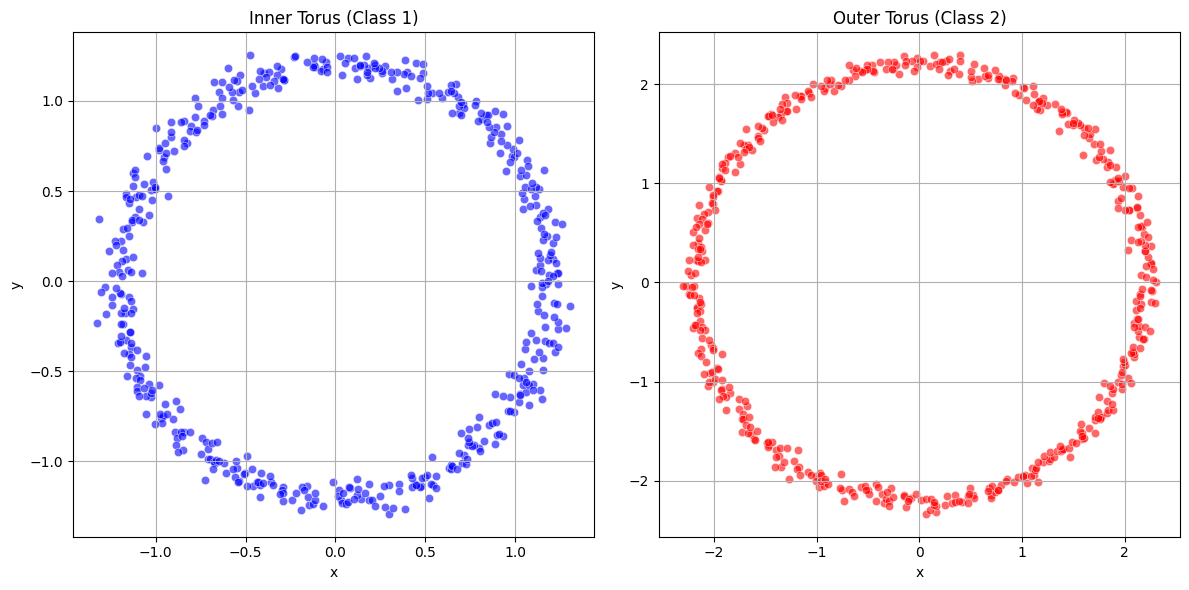

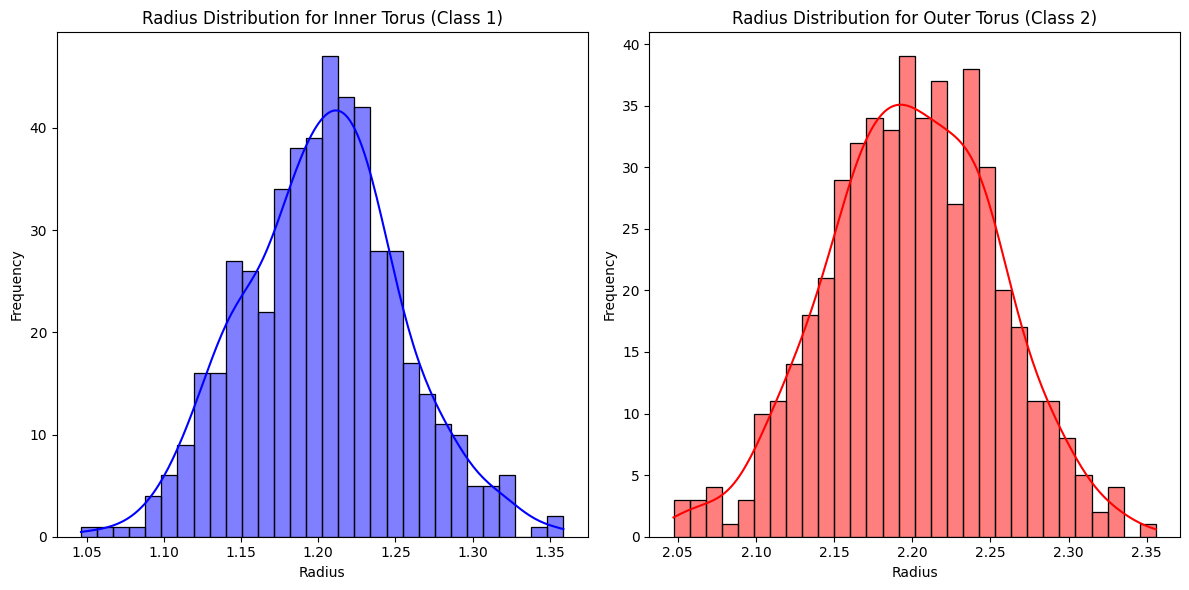

In [23]:
def compute_radius(x, y):
    return np.sqrt(x**2 + y**2)
df['radius'] = compute_radius(df['x'], df['y'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df[df['class'] == 'class_1'], x='x', y='y', color='blue', alpha=0.6)
plt.title('Inner Torus (Class 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df[df['class'] == 'class_2'], x='x', y='y', color='red', alpha=0.6)
plt.title('Outer Torus (Class 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df['class'] == 'class_1']['radius'], bins=30, color='blue', kde=True)
plt.title('Radius Distribution for Inner Torus (Class 1)')
plt.xlabel('Radius')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['class'] == 'class_2']['radius'], bins=30, color='red', kde=True)
plt.title('Radius Distribution for Outer Torus (Class 2)')
plt.xlabel('Radius')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Тор — це щось типу пончика, де точка розташована на колі, яке обертається навколо іншого кола. Ми маємо це у 2D вигляді. Внутрішній тор має радіус 1.0 і товщину кільця 0.2, тому точки розташовані на відстані від 0.8 до 1.2 одиниць від центра. Зовнішній тор має радіус 2.0 і товщину 0.2, тобто точки на відстані від 1.8 до 2.2 одиниць від центра. Для створення точок використовуємо кути- один кут визначає положення точки на колі а інший як далеко точка знаходиться від центра кільця. Щоб дані виглядали трохи природніше, додаємо трохи випадкових відхилень щоб точки не були такими ідеально рівними.

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

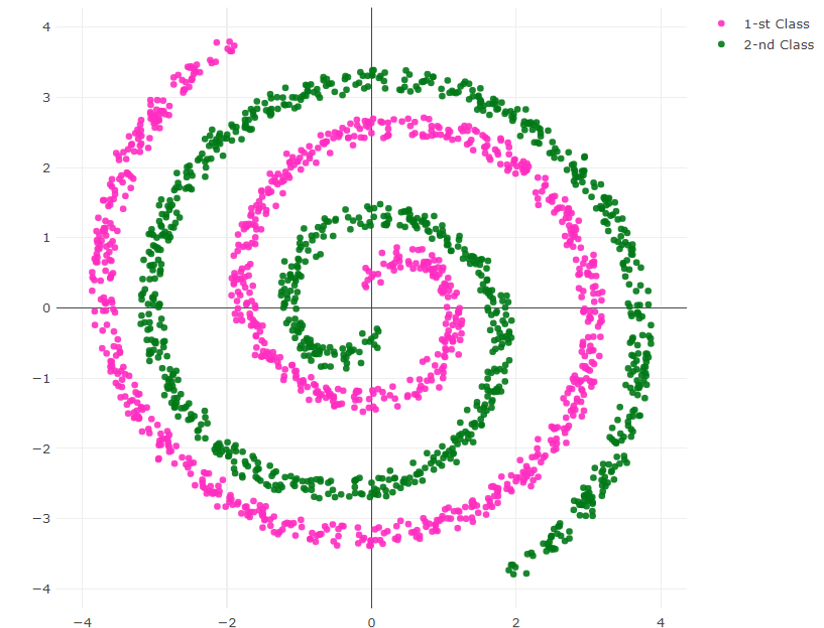

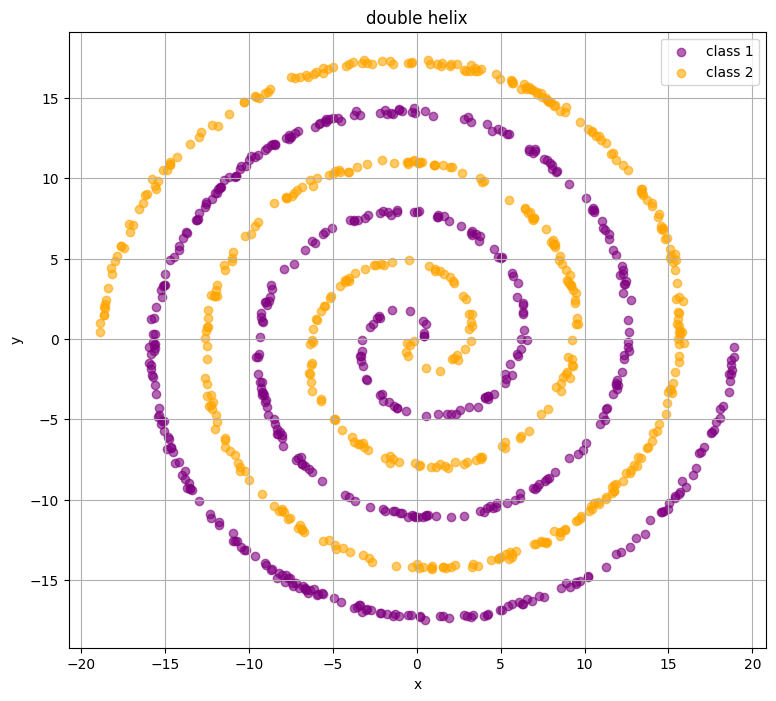

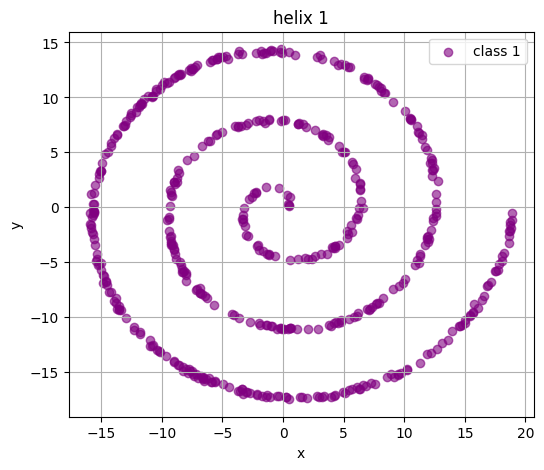

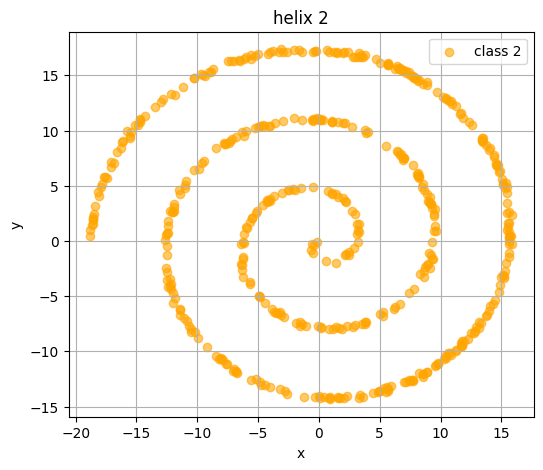

In [15]:
n_points = 500  
noise = 0.1  
twist_factor = 3  

theta = np.sqrt(np.random.rand(n_points)) * 2 * np.pi * twist_factor  
r1 = 1.0 * theta  
r2 = -1.0 * theta  

x1 = r1 * np.cos(theta) + np.random.randn(n_points) * noise
y1 = r1 * np.sin(theta) + np.random.randn(n_points) * noise
class1 = np.ones(n_points)
x2 = r2 * np.cos(theta) + np.random.randn(n_points) * noise
y2 = r2 * np.sin(theta) + np.random.randn(n_points) * noise
class2 = np.zeros(n_points)

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
classes = np.concatenate([class1, class2])

data = pd.DataFrame({'x': x, 'y': y, 'class': classes})

data.to_csv('dshw2.csv', index=False)
plt.figure(figsize=(9, 8))
plt.scatter(x1, y1, c='purple', label='class 1', alpha=0.6)  
plt.scatter(x2, y2, c='orange', label='class 2', alpha=0.6)  
plt.title('double helix')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 5))
plt.scatter(x1, y1, c='purple', label='class 1', alpha=0.6)
plt.title('helix 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(x2, y2, c='orange', label='class 2', alpha=0.6)
plt.title('helix 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Я генерувала дві спіралі по 500 точок кожна. Спочатку визначила, наскільки закрученими вони будуть — вирішила зробити по кілька витків, щоб виглядали як в прикладі, тому взяла параметр закрученості в три рази більшим. Потім для кожної точки випадково обрала кут і на його основі розрахувала, наскільки далеко точка буде від центру.
Для першої спіралі точки поступово віддаляються від центру, а для другої спіралі — теж саме, але в інший бік. Додала ще трохи випадкового шуму, щоб точки не виглядали ідеально рівно тому вони розміщені трохи нерівномірно, як у реальних даних.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

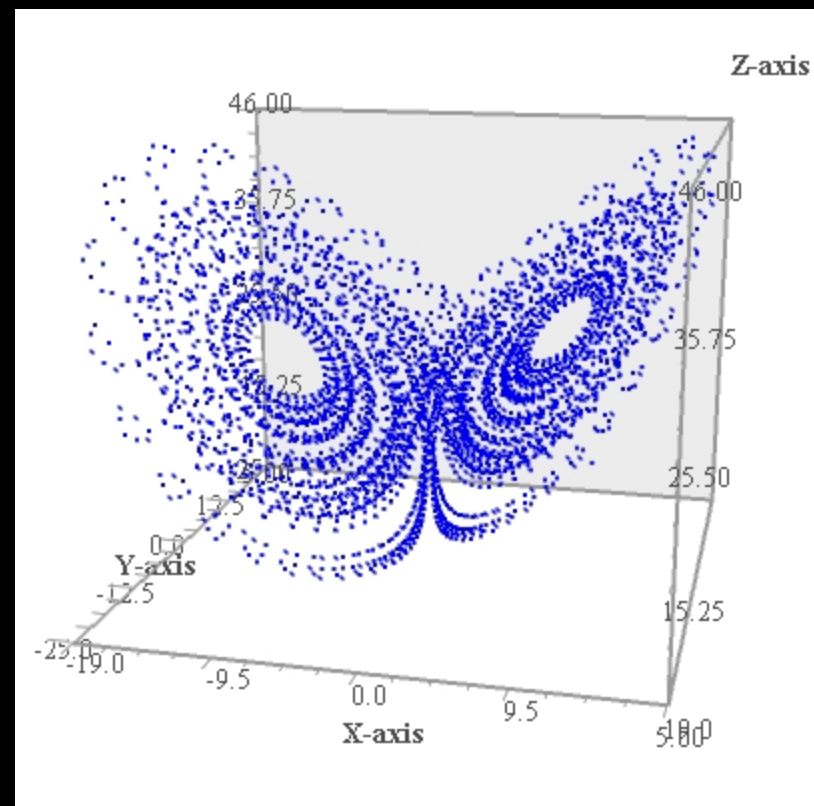

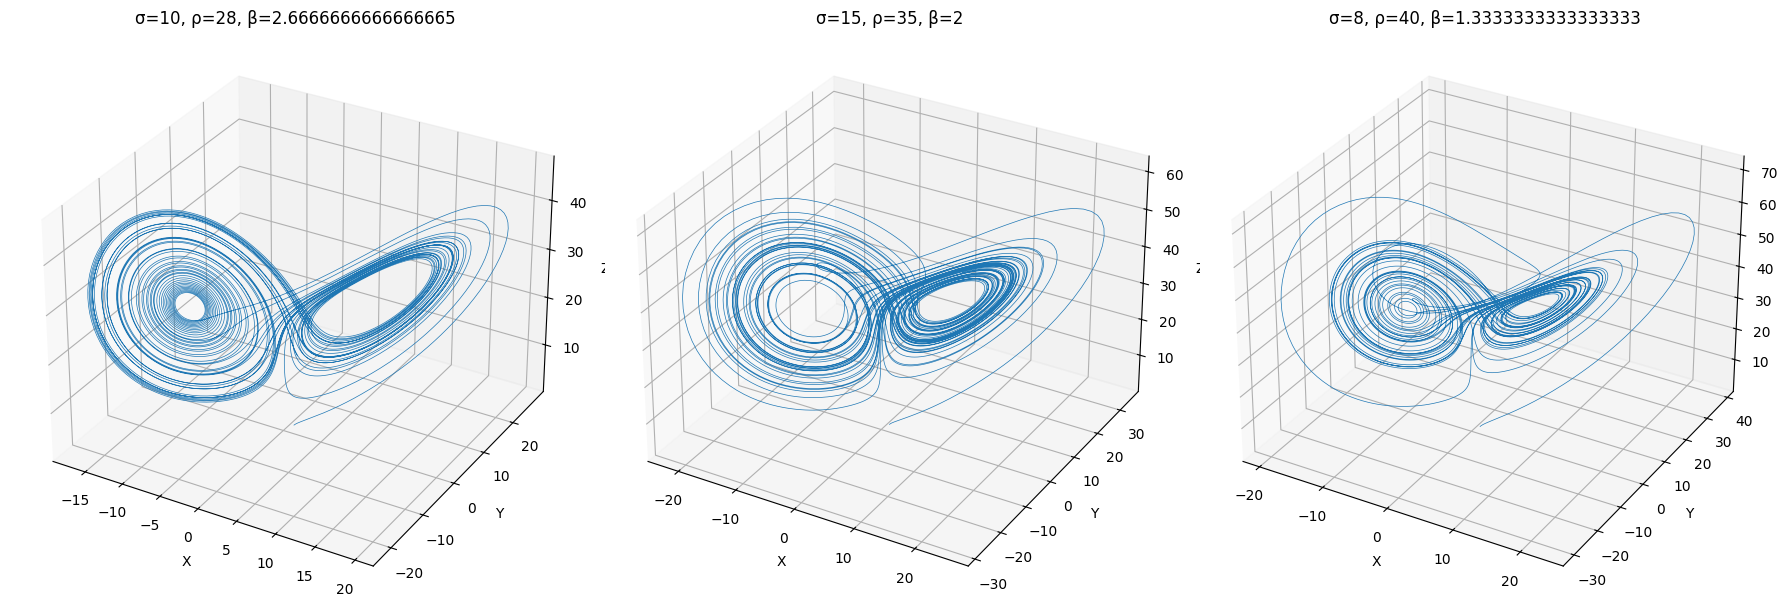

In [17]:
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def generate_lorenz_trajectory(sigma, rho, beta, t_span, initial_state):
    solution = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), dense_output=True)
    t = np.linspace(t_span[0], t_span[1], 10000)
    x, y, z = solution.sol(t)
    return x, y, z

initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)

params = [
    {'sigma': 10, 'rho': 28, 'beta': 8/3},
    {'sigma': 15, 'rho': 35, 'beta': 2},
    {'sigma': 8, 'rho': 40, 'beta': 4/3}
]
fig = plt.figure(figsize=(18, 6))

for i, param in enumerate(params):
    sigma, rho, beta = param['sigma'], param['rho'], param['beta']
    x, y, z = generate_lorenz_trajectory(sigma, rho, beta, t_span, initial_state)
    
    ax = fig.add_subplot(1, len(params), i + 1, projection='3d')
    ax.plot(x, y, z, lw=0.5)
    ax.set_title(f"σ={sigma}, ρ={rho}, β={beta}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

Код малює траєкторії системи Лоренца для різних параметрів у 3D. Ось як ці параметри впливають на динаміку системи: σ- контролює швидкість змін по осі X. Коли я збільшую σ, система стає більш хаотичною і складною. ρ- впливає на розтягання траєкторій вздовж осі Z. Збільшення ρ розтягує траєкторії, створюючи більше хаосу. β- визначає як змінюється система вздовж осі Z. Менша β робить траєкторії більш хаотичними і витягнутими, а більша β робить їх стабільнішими. При σ=10, ρ=28, β=8/3 траєкторії виглядають як класичний атрактор Лоренца з двома витками. При σ=15, ρ=35, β=2 траєкторії стають більш складними і хаотичними. При σ=8, ρ=40, β=4/3 траєкторії менш складні, але все ще демонструють хаос.